---
## SVM voor regressie

SVM-algorithm kan ook gebruikt worden voor regressie vraagstukken. Het wordt dan **Support Vector Regression** genoemd, afgekort **SVR**.

We gebruiken scikit-learn en importeren `SVR` uit `sklearn.svm`.

### Voorbeeld Support Vector Regression

dataset: `SVR-Data.csv`

We beginnen met een eenvoudig voorbeeld van een dataset met twee kolommen `x` en `y`. Hier is `x` het kenmerk (*feature*) en `y` het label (*target*). We gaan `y` voorspellen met `x` als onafhankelijke variabele.

Bron: 
- Dhiraj K (2020), [Support Vector Regression in Python Using Scikit-Learn](https://heartbeat.comet.ml/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7)

In [1]:
# helper functions

%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names
                      )

# Excel XLS-file
def load_xls_pd_data(path, filename, 
                     names=None
                    ):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path,
                         names=names
                        )

# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_svm_regression_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, 
                format=fig_extension, 
                dpi=resolution
    )


### Inladen dataset 
We maken gebruik van de helper functie `load_csv_pd_data()` zodat we datafiles in kunnen lezen zonder rekening te houden met platform-afhankelijkheden voor files en folders.

In [2]:
path = "./data/"
filename = "SVR-Data.csv"
dataset = load_csv_pd_data(path, filename)

C:\Users\hq0132410\AppData\Local\Temp\ipykernel_8140\3195170361.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(csv_path,


In [3]:
dataset.head() # first 5 samples
#dataset.sample(5)  # take 5 random samples

,x,y
0,168.181818,160.840244
1,187.878788,159.413657
2,207.575758,157.136809
3,227.272727,159.357847
4,246.969697,157.542862


Voordat we de gegevens aan het Support Vector Regression algorithm aanbieden, moeten we wat voorbewerkingen uitvoeren.

We beginnen met het visualiseren van de dataset.

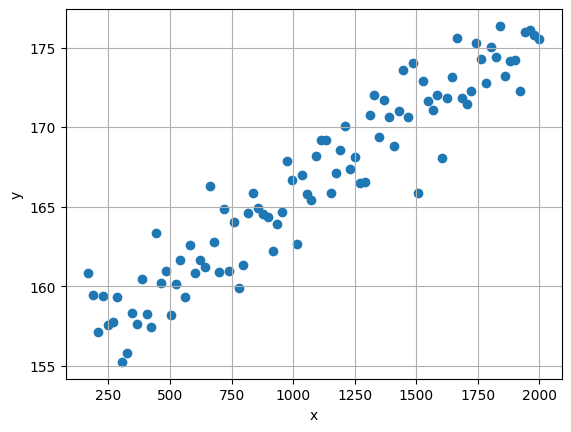

In [4]:
# plot dataset
plt.scatter(dataset.x, dataset.y)

# add labels
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

#save_fig("SVR_regression_data")
plt.show()

Uit plot blijkt dat er mogelijk een lineair verband is tussen `x` en `y`. 

Verder blijkt dat de variabelen een 2D-array moeten zijn om door SVR te worden behandeld. We gebruiken hier de methode `reshape(-1, 1)` voor.

In [5]:
# Reshape data to 2D-array for SVR
# PP: preserve original x and y
x_rs = dataset.x.values.reshape(-1, 1)
y_rs = dataset.y.values.reshape(-1, 1)
# x_rs
# y_rs

We splitsen de data in trainingsdata en testdata.
De testgrootte is 0,4, hetgeen betekent dat we 40% van de gegevens gebruiken om te testen. De `random_state` zorgt voor reproduceerbaarheid.

In [6]:
from sklearn.model_selection import train_test_split

# Testset size: 40%
x_train, x_test, y_train, y_test = train_test_split(
    x_rs, y_rs, 
    test_size=0.40,
    random_state=42
)
y_train[:5]  # Note: y_train is an 2D-array

array([[155.23404557],
       [175.27019817],
       [160.88457814],
       [161.6460876 ],
       [175.60730324]])

#### Train het SRV-algorithm
We gaan `x_train` en `y_train` gebruiken om een lineaire SVR-algorithm te trainen. We gebruiken de `fit` methode en geven de default parameters door.

In [7]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr_model = svr.fit(x_train, y_train.ravel())

In [8]:
# predictions
y_pred = svr_model.predict(x_test)
y_pred[:5]  # print first 5 predictions

array([164.92762222, 161.27648375, 167.97023762, 171.41853507,
       156.81398116])

### Evalueer het SRV-model
Voor regressie zijn R<sup>2</sup>, `mse` en `rmse` de model validation metrieken

- R<sup>2</sup> = R2-score
- MSE = Mean Square Error
- RMSE = Root Mean Square Error

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

# calculate r2_score
r2score = r2_score(y_test, y_pred)

# Mean Square Error
mse = mean_squared_error(y_test, y_pred) 

# calculate Root Mean Square Error
rmse = np.sqrt(mse)

print(f"r2-score : {r2score}")
print(f"mse : {mse}")
print(f"rmse: {rmse}")

r2-score : 0.8922841110467916
mse : 3.1563672627424886
rmse: 1.776616802448544


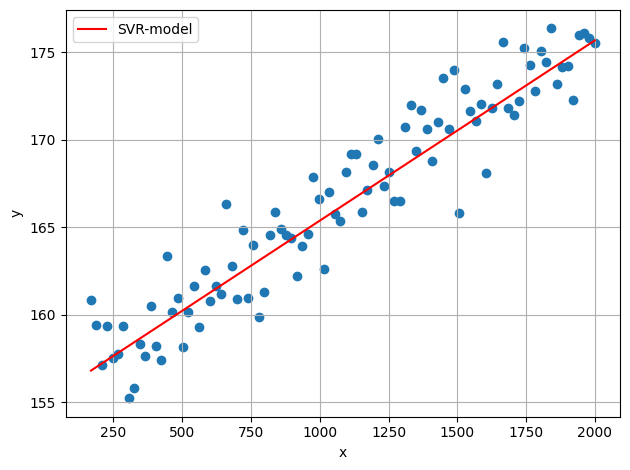

In [10]:
# plot the data
plt.scatter(x_rs, y_rs)

# add the line of prediction on full range of x
plt.plot(
    x_rs, svr_model.predict(x_rs), 
    "-r", label="SVR-model"
) 

# add labels
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
save_fig("SVR_regression_prediction")
plt.show()

In [11]:
# some other metrics

# variance score: 1 is perfect prediction
variance_score = r2_score(y_test, y_pred)
print(f"Variance score:{variance_score:.2f}")

# accuracy: higher is better
accuracy = svr_model.score(x_test, y_test)
print("Prediction Accuracy: {:.2f}%".format(accuracy * 100))

Variance score:0.89
Prediction Accuracy: 89.23%


---